In [58]:
import os
import glob
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from numpy.linalg import svd, eig
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from pandas.plotting import scatter_matrix
import numpy as np
import cv2

from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import save

# Always make it pretty.
plt.style.use('ggplot')

# Ensure plots embeded in notebook
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

In [6]:
# Prepare data
# In this case, font images for "a"
imgSrcDir = 'test_photo'
dog_test_photos = [os.path.join(imgSrcDir, f) for f in os.listdir(imgSrcDir) if f.endswith(".jpg")]

In [7]:
imgSrcDir = 'test2'
dog_test_photos2 = [os.path.join(imgSrcDir, f) for f in os.listdir(imgSrcDir) if f.endswith(".jpg")]

In [8]:
dog_test_photos2

['test2/adam-hles-iV_N83Y-j_A-unsplash.jpg']

In [9]:
dog_test_photos

['test_photo/dog-photo-booky-brown-dog-trilby.jpg',
 'test_photo/aalap-pathak-cI6dsA83uEM-unsplash.jpg',
 'test_photo/adam-hles-iV_N83Y-j_A-unsplash.jpg',
 'test_photo/dog-photo-boggle-wearing-dunce-hat-fool.jpg',
 'test_photo/dog-photo-smiling-pitbull-tall-tophat.jpg']

In [53]:
dog_matrix = np.asarray(img)

In [54]:
dog_matrix

array([[[255, 255],
        [255, 255],
        [255, 255],
        ...,
        [255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255],
        ...,
        [255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255],
        ...,
        [255, 255],
        [255, 255],
        [255, 255]],

       ...,

       [[255, 255],
        [255, 255],
        [255, 255],
        ...,
        [255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255],
        ...,
        [255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255],
        ...,
        [255, 255],
        [255, 255],
        [255, 255]]], dtype=uint8)

'test_photo/dog-photo-booky-brown-dog-trilby.jpg'

In [55]:
# load images into matrix
im_matrix = np.array([np.array(Image.open(im, 'r')).flatten() for im in dog_matrix], 'f')

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [ ]:
im2_matrix = np.array([np.array(Image.open(im, 'r'))
                 for im in dog_test_photos2], 'f')

In [11]:
im_matrix.shape

NameError: name 'im_matrix' is not defined

In [12]:
im2_matrix.shape

NameError: name 'im2_matrix' is not defined

In [13]:
print(im_matrix)
plt.imshow(im_matrix, cmap=cm.gray)

NameError: name 'im_matrix' is not defined

In [49]:

img = Image.open('test_photo/dog-photo-smiling-pitbull-tall-tophat.jpg').convert('LA')
img.save('greyscale.png')

In [56]:
python --version

NameError: name 'python' is not defined

In [50]:
import numpy
numpy.version.version

'1.17.2'

In [15]:
# define location of dataset
folder = 'test_tensor/'
photos, labels = list(), list()
# enumerate files in the directory
for file in os.listdir(folder):
    # determine class
    output = 0.0
    if file.endswith('.jpg'):
        output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = np.asarray(photos)
labels = np.asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dog_test_photos.npy', photos)
save('dog_test_labels.npy', labels)

(5, 200, 200, 3) (5,)


In [16]:
from numpy import load
photos = load('dog_test_photos.npy')
labels = load('dog_test_labels.npy')
print(photos.shape, labels.shape)

(5, 200, 200, 3) (5,)


In [34]:
n_row, n_col = 2, 3
n_components = n_row * n_col -1
image_shape = (200, 200)

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(photos):
        plt.subplot(n_row, n_col, i + 1)
#         vmax = max(comp.max(), -comp.min())
#         plt.imshow((comp * 255).astype(np.uint8))
        cmap=plt.cm.gray
        plt.imshow(comp.astype('uint8'), )
#         plt.imshow(comp,
#                    interpolation='nearest',
#                    vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

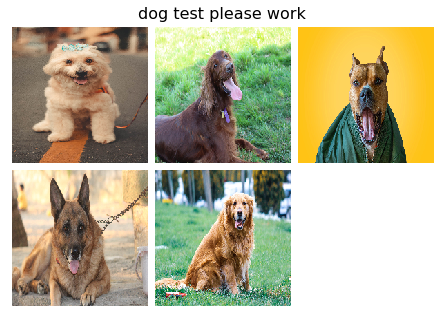

In [35]:
plot_gallery("dog test please work", photos[:,n_components])

In [22]:
photos.shape[0]

5

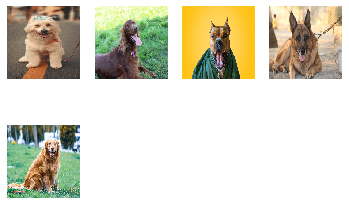

In [30]:
# lwf_src_dir = "lfw/Bill_Clinton"
# bclinton_files = [os.path.join(lwf_src_dir, f) for f in os.listdir(lwf_src_dir) if f.endswith(".jpg")]
# ## Display first 7 images
# fig_org = plt.figure()

# tmp_img = np.array(Image.open(bclinton_files[0], 'r').convert('L'),'f')
# m,n = tmp_img.shape


# # load images into matrix
# lwf_immatrix = np.array([np.array(Image.open(im, 'r').convert('L'),'f').flatten()
#                  for im in bclinton_files], 'f')

for i in range(photos.shape[0]):
    plt.subplot(2,4,i+1)
    plt.imshow(photos[i].astype('uint8'))
    plt.axis('off')

array([88., 58., 47., ..., 67., 61., 61.], dtype=float32)

In [39]:
dog_pca = PCA(100).fit()

ValueError: Found array with dim 4. Estimator expected <= 2.

# Trying out BoVWs

In [19]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans


# takes all images and convert them to grayscale. 
# return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
#         print(filename, path)
        for cat in path:
            img = cv2.imread(path)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                category.append(img)
        images[filename] = category
    return images

images = load_images_from_folder('test_tensor')  # take all images category by category 
test = load_images_from_folder("test_photo") # take test images 

In [20]:
test


{'.DS_Store': [],
 'dog-photo-booky-brown-dog-trilby.jpg': [array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255,

In [23]:
# Creates descriptors using sift 
# Takes one parameter that is images dictionary
# Return an array whose first index holds the decriptor_list without an order
# And the second index holds the sift_vectors dictionary which holds the descriptors but this is seperated class by class
import cv2
def sift_features(images):
    sift_vectors = {}
    descriptor_list = []
    
    sift = cv2.xfeatures2d.SIFT_create()
    for key,value in images.items():
        features = []
        for img in value:
            kp, des = sift.detectAndCompute(img,None)
           
            
            descriptor_list.extend(des)
            features.append(des)
        sift_vectors[key] = features
    return [descriptor_list, sift_vectors]

sifts = sift_features(images) 
# Takes the descriptor list which is unordered one
descriptor_list = sifts[0] 
# Takes the sift features that is seperated class by class for train data
all_bovw_feature = sifts[1] 
# Takes the sift features that is seperated class by class for test data
test_bovw_feature = sift_features(test)[1] 

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [24]:
cv2.__version__

'3.4.2'